[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/csabiu/WOC/blob/main/nb/tutorial.ipynb)

In [1]:
from pywoc import woc
from astropy.io import fits
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from astropy.convolution import convolve
from astropy.convolution import Gaussian2DKernel
from mpl_toolkits.axes_grid1 import make_axes_locatable



# Generate some 2-D gaussian distributions

[42.69232983 56.46091305 70.22949628 83.99807951]


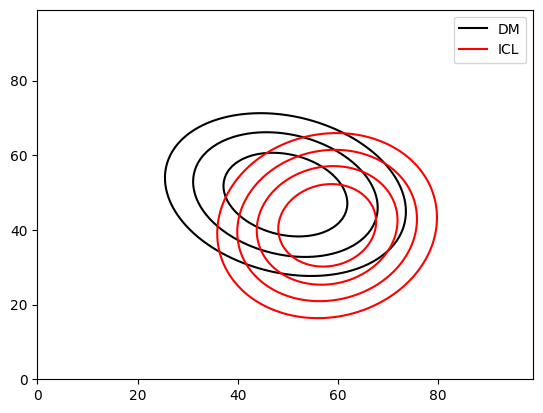

In [2]:
x,y=np.random.multivariate_normal((500,500), ((8600,-10200),(4000,6600)), 200000,check_valid='ignore').T

a,b,c=np.histogram2d(x,y,100,range=((200,800),(200,800)))
kernel = Gaussian2DKernel(10, mode='linear_interp')

dm_model = convolve(a,kernel,boundary='extend', nan_treatment='interpolate', preserve_nan=False)
levels=np.linspace(2*np.std(dm_model),np.max(dm_model),4)
print(levels)

plt.contour(dm_model,levels=levels, colors='black')
plt.plot([0,0],[0,0],'k-',label='DM')

x,y=np.random.multivariate_normal((450,550), ((8600,-1200),(4000,6600)), 200000,check_valid='ignore').T
a,b,c=np.histogram2d(x,y,100,range=((200,800),(200,800)))
kernel = Gaussian2DKernel(10, mode='linear_interp')

icl_model = convolve(a,kernel,boundary='extend', nan_treatment='interpolate', preserve_nan=False)
plt.contour(icl_model,levels=levels, colors='red')
plt.plot([0,0],[0,0],'r-',label='ICL')
plt.legend()
plt.show()
plt.close()


In [3]:
woc(dm_model,icl_model,[10,20,30])

computing centre [50. 50.]
Area at radius of 10 = 320.0
overlap area at radius of 10 = 103.0
Enclosed mass1 fraction at radius of 10 = 0.12834331402448132
Enclosed mass2 fraction at radius of 10 = 0.15071672239264303
Area at radius of 20 = 1268.0
overlap area at radius of 20 = 805.0
Enclosed mass1 fraction at radius of 20 = 0.42123874636170283
Enclosed mass2 fraction at radius of 20 = 0.47713673938831375
Area at radius of 30 = 2883.0
overlap area at radius of 30 = 2148.0
Enclosed mass1 fraction at radius of 30 = 0.716148934355935
Enclosed mass2 fraction at radius of 30 = 0.7768779746539773
woc: 0.33085705043543545


0.33085705043543545

In [4]:
radial_profile

<function woc.radial_profile.radial_profile(data, mask, center, rmin, rmax, width)>